# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [2]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [4]:
# Your code here
print(df.head())

def alpha_func(D, idx):
    subset = D.iloc[idx]
    
    var_length = np.var(subset['Sepal.Length'])
    var_width = np.var(subset['Sepal.Width'])
    
    alpha = var_length / var_width
    
    return alpha

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Test the code below

In [5]:
alpha_func(df, range(100))

1.7966540178669808

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

2.4301464922876552

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Answer: Simply calculating the mean of Sepal.Length gives us an estimate of the central tendency of the sepal lengths. This does not provide information about the variability or uncertainty of this estimate. The mean alone does not indicate how reliable this estimate is or how much it might vary with different samples.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [7]:
# Add your code here to set the seed

np.random.seed(42)

def boot_SE(data, num_bootstrap_samples=1000):
    boot_means = []
    

    for _ in range(num_bootstrap_samples):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        boot_mean = bootstrap_sample['Sepal.Length'].mean()
        boot_means.append(boot_mean)
    
    boot_se = np.std(boot_means)
    
    return boot_se

sepal_length_boot_se = boot_SE(df)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [8]:
# Your code here
def bootstrap_alpha(data, B=1000):
    rng = np.random.default_rng(42)  
    boot_alphas = []

    for _ in range(B):
        bootstrap_sample_indices = rng.choice(len(data), len(data), replace=True)

        alpha_value = alpha_func(data, bootstrap_sample_indices)
        boot_alphas.append(alpha_value)
    
    return np.array(boot_alphas)

bootstrap_alphas = bootstrap_alpha(df)

alpha_mean = np.mean(bootstrap_alphas)
alpha_std = np.std(bootstrap_alphas)

print(f"Bootstrap Alpha Mean: {alpha_mean}")
print(f"Bootstrap Alpha Standard Deviation: {alpha_std}")

Bootstrap Alpha Mean: 3.6529194387864865
Bootstrap Alpha Standard Deviation: 0.6032158888673489


_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [9]:
# Add your code here

# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

print(f"Original Mean of Sepal.Length: {original_mean_sepal_length}")

def boot_SE(data, num_bootstrap_samples=1000):
    # Initialize a list to store the mean values from bootstrap samples
    boot_means = []
    
    # Perform bootstrapping
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample
        bootstrap_sample = data.sample(n=len(data), replace=True)
        # Calculate the mean of the bootstrap sample
        boot_mean = bootstrap_sample['Sepal.Length'].mean()
        # Append the mean to the list
        boot_means.append(boot_mean)
    
    # Convert list to numpy array
    boot_means = np.array(boot_means)
    
    # Calculate the standard error of the bootstrap means
    boot_se = np.std(boot_means)
    
    return boot_se, boot_means

# Compute the bootstrap standard error and bootstrap samples for Sepal.Length
sepal_length_boot_se, boot_se_samples = boot_SE(df)

# Calculate the range of the bootstrapped samples
t_range = np.ptp(boot_se_samples)

print(f"Bootstrap Standard Error of Sepal.Length: {sepal_length_boot_se}")
print(f"Range of Bootstrapped Samples: {t_range}")

# Calculate the mean and standard deviation of the bootstrapped samples
boot_mean = np.mean(boot_se_samples)
boot_std = np.std(boot_se_samples)

print(f"Bootstrapped Mean of Sepal.Length: {boot_mean}")
print(f"Bootstrapped Standard Deviation of Sepal.Length: {boot_std}")

# Compare the bootstrapped mean against the original mean
print(f"Original Mean of Sepal.Length: {original_mean_sepal_length}")
print(f"Difference between Bootstrapped Mean and Original Mean: {boot_mean - original_mean_sepal_length}")


Original Mean of Sepal.Length: 5.843333333333334
Bootstrap Standard Error of Sepal.Length: 0.06853610473968365
Range of Bootstrapped Samples: 0.44266666666666765
Bootstrapped Mean of Sepal.Length: 5.842439333333334
Bootstrapped Standard Deviation of Sepal.Length: 0.06853610473968365
Original Mean of Sepal.Length: 5.843333333333334
Difference between Bootstrapped Mean and Original Mean: -0.0008939999999997283


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [10]:
# Add your code here
conf_interval = np.percentile(boot_se_samples, [2.5, 97.5])

print(f"95% Confidence Interval for the Mean of Sepal.Length: {conf_interval}")

95% Confidence Interval for the Mean of Sepal.Length: [5.70665    5.97733333]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

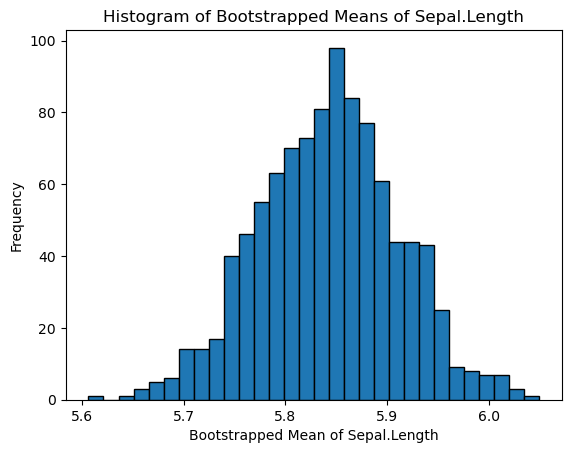

In [11]:
#Complete this

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples, bins=30, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Means of Sepal.Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [12]:
# Write your answer here
The shipping company should plan for an average Sepal.Length of 5.84 cm, consider using 5.99 cm as a safe upper bound, and regularly monitor the lengths to ensure consistency.

SyntaxError: invalid syntax (1375748642.py, line 2)

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
